In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')

In [39]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Feature Engineering & Filling Missing Values

Let's find all missing values in train dataset, than in test dataset. They may be different, anyways we have to fill all of them (if we will use all the columns as a features).

In [41]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Embarked 

Let's find out who are the passengers with missed values in an Embarked column.

In [43]:
train_data.Embarked[train_data.Embarked.isnull() == True]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [44]:
train_data.loc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                           38.0
SibSp                            0
Parch                            0
Ticket                      113572
Fare                          80.0
Cabin                          B28
Embarked                       NaN
Name: 61, dtype: object

In [45]:
train_data.loc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                 62.0
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                80.0
Cabin                                                B28
Embarked                                             NaN
Name: 829, dtype: object

As you can see, these two women have no information in Embarked field, but fortunately they have any other data. Based on their Pclass column information, I want to research: in what city most female passengers embarked? 

In [46]:
# full_Embarked = pd.concat([train_data[(train_data.Pclass == 1) & (train_data.Sex == 'female')].Embarked,
#                     test_data[(test_data.Pclass == 1) & (test_data.Sex == 'female')].Embarked], ignore_index=False)
# full_Embarked.describe()

So, let our two women also embarked at Cherbourg.

In [47]:
# train_data['Embarked_Imputed'] = train_data.Embarked.isnull().astype('int')
# test_data['Embarked_Imputed'] = test_data.Embarked.isnull().astype('int')

In [48]:
# train_data.Embarked.fillna('C', inplace=True)

In [49]:
# train_data.Embarked.isnull().any()

I'll try to just drop this two rows, because it shouldn't have a great effect on a whole dataset.

In [50]:
train_data.drop([61, 829], inplace=True)
train_data.index = range(889)

In [51]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Name

I'll use two ways to extract usefull information from a Name column.

1) Extract all prefixes like Mr, Miss, etc and range all of it. It will let me to create Titul feature to take into account social status of each passenger.

2) From all of prefixes get Master prefix. It will show me important information about value in an Age column and will let to create BoyOrWoman feature.

In [52]:
full_Name = pd.concat([train_data.Name, test_data.Name])

In [53]:
prefixes = set()
for string in full_Name:
    prefix = string[string.find(',') + 2:string.find('.')]
    prefixes.add(prefix)

prefixes

{'Capt',
 'Col',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

1. Col - colonel 
2. Major 
3. Capt - capitan 


1. the Countess
2. Lady, Sir, Mme, 
3. Don, Dona, Jonkheer, Mr, Miss, Mlle, Mrs, Ms


1. Dr - doctor
2. Master - boy
3. Rev - man of church 

In [54]:
titul_1, titul_2 = ['Col', 'Major', 'Capt', 'the Countess'], ['Lady', 'Sir', 'Mme']

Now let's figure out for each passenger: can I assign they to the BoyOrWoman category and fill their value in that column, determine they Titul value.

In [55]:
train_data.insert(6, 'BoyOrWoman', 0)
train_data.insert(4, 'Titul', 3)

In [56]:
for i in range(train_data.shape[0]):
    if train_data.Name[i].find('Master') != -1 or train_data.Sex[i] == 'female':
        train_data.at[i, 'BoyOrWoman'] = 1

In [57]:
for i in range(train_data.shape[0]):
    for first in titul_1:
        if train_data.Name[i].find(first) != -1:
            train_data.at[i, 'Titul'] = 1
    for second in titul_2:
        if train_data.Name[i].find(second) != -1:
            train_data.at[i, 'Titul'] = 2

In [58]:
train_data

,PassengerId,Survived,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",3,male,22.0,0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3,female,38.0,1,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",3,female,26.0,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,female,35.0,1,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",3,male,35.0,0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",3,male,27.0,0,0,0,211536,13.0000,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",3,female,19.0,1,0,0,112053,30.0000,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,1,2,W./C. 6607,23.4500,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",3,male,26.0,0,0,0,111369,30.0000,C148,C


In [59]:
test_data.insert(5, 'BoyOrWoman', 0)
test_data.insert(3, 'Titul', 3)

In [60]:
for i in range(test_data.shape[0]):
    if test_data.Name[i].find('Master') != -1 or test_data.Sex[i] == 'female':
        test_data.at[i, 'BoyOrWoman'] = 1

In [61]:
for i in range(test_data.shape[0]):
    for first in titul_1:
        if test_data.Name[i].find(first) != -1:
            test_data.at[i, 'Titul'] = 1
    for second in titul_2:
        if test_data.Name[i].find(second) != -1:
            test_data.at[i, 'Titul'] = 2

In [62]:
test_data

,PassengerId,Pclass,Name,Titul,Sex,Age,BoyOrWoman,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",3,male,34.5,0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",3,female,47.0,1,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",3,male,62.0,0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",3,male,27.0,0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3,female,22.0,1,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",3,male,NaN,0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",3,female,39.0,1,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",3,male,38.5,0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",3,male,NaN,0,0,0,359309,8.0500,NaN,S


## Age

Let's build a regression model based on features like Pclass, Fare, Embarked, etc and try to predict missing values in an Age column. 

In [63]:
train_data['Age_Imputed'] = train_data.Age.isnull().astype('int')
test_data['Age_Imputed'] = test_data.Age.isnull().astype('int')

In [66]:
clean_data_Age = pd.concat([train_data[~train_data.Age.isnull()], 
                            test_data[~test_data.Age.isnull()]], ignore_index=True)

y_Age = clean_data_Age.Age
features_Age = ['Pclass', 'Titul', 'Sex', 'Embarked', 'BoyOrWoman']
X_Age = pd.get_dummies(clean_data_Age[features_Age])
X_Age

,Pclass,Titul,BoyOrWoman,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,3,0,0,1,0,0,1
1,1,3,1,1,0,1,0,0
2,3,3,1,1,0,0,0,1
3,1,3,1,1,0,0,0,1
4,3,3,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1039,3,3,1,1,0,0,0,1
1040,1,3,1,1,0,0,1,0
1041,3,3,1,1,0,0,0,1
1042,1,3,1,1,0,1,0,0


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

X_Age_train, X_Age_val, y_Age_train, y_Age_val = train_test_split(X_Age, y_Age, test_size=0.2, random_state=0)

parameters_Age = {
    'n_estimators' : [100, 150, 200, 250, 300],
    'max_depth' : [5, 6, 7, 8, 9],
    'min_samples_split' : [3, 4, 5, 6, 7],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
model_Age = RandomForestRegressor()

In [68]:
grid_Age = GridSearchCV(model_Age, parameters_Age, cv=5, n_jobs=-1)
grid_Age.fit(X_Age_train, y_Age_train)

grid_Age.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [69]:
best_model_Age = grid_Age.best_estimator_

In [70]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_Age_val, best_model_Age.predict(X_Age_val))

8.707371062677698

In [71]:
raw_data_Age = pd.concat([train_data[train_data.Age.isnull()], 
                          test_data[test_data.Age.isnull()]], ignore_index=True)

X_Age_test = pd.get_dummies(raw_data_Age[features_Age])
X_Age_test

,Pclass,Titul,BoyOrWoman,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,3,0,0,1,0,1,0
1,2,3,0,0,1,0,0,1
2,3,3,1,1,0,1,0,0
3,3,3,0,0,1,1,0,0
4,3,3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...
258,3,3,1,1,0,0,1,0
259,3,3,1,1,0,0,1,0
260,3,3,0,0,1,0,0,1
261,3,3,0,0,1,0,0,1


In [72]:
prediction_Age = best_model_Age.predict(X_Age_test)
prediction_Age = prediction_Age.round(1)

In [74]:
prediction_Age

array([34.8, 33. , 18. , 24.5, 24.9, 28.3, 38.3, 24.9, 24.5, 24.5, 28.3,
       34.8, 24.9, 24.5, 41.7, 41.3,  6.3, 28.3, 28.3, 24.9, 28.3, 28.3,
       28.3, 28.3, 24.9, 28.3, 34.8, 18. , 18. , 28.3, 28.3,  6.3, 35.4,
       41.7,  6.3, 22.4, 28. , 41.7, 24.9, 34.8, 24.9, 28.3, 34.8, 28.3,
       22.4, 22.4, 18. , 24.9, 28.3, 38.3, 34.8, 24.9, 41.7, 24.9, 33. ,
       41.7, 41.3, 41.7, 24.9, 34.8, 27.9, 28.3, 38.3, 28.3, 24.9, 35.4,
       28.3, 22.4, 41.7, 24.5, 24.9, 24.9, 34.8, 18. , 24.9, 38.3, 28.3,
       34.8, 22.4, 28.3, 34.8, 33. , 22.4, 24.5, 28.3, 34.8, 22.4, 28.3,
       28.3, 28.3, 35.4, 34.8, 28.3, 33. , 34.8, 28.3, 41.7, 33. , 22.4,
       28.3, 24.5, 28.3, 24.9, 41.7, 28.3, 34.8, 24.5, 24.5, 41.7, 24.5,
       18. , 28.3, 28. , 34.8, 41.3, 34.8, 28.3, 22.4, 24.5, 24.9, 18. ,
       24.5, 28.3, 24.9, 28.9, 24.5, 28.3, 41.7, 28.3, 24.9, 34.8, 34.8,
       41.7, 28.3, 28.3, 28.3, 28.3, 24.9, 28.3, 28.3, 35.4, 33. , 24.9,
       28.3, 24.9,  6.3, 41.7, 34.8, 24.9, 33. , 28

In [75]:
train_missing_Age = train_data.Age[train_data.Age.isnull()]
test_missing_Age = test_data.Age[test_data.Age.isnull()] 

In [76]:
counter_Age = 0
for i in range(train_data.Age.shape[0]):
    if i in train_missing_Age.index:
        train_data.at[i, 'Age'] = prediction_Age[counter_Age]
        counter_Age += 1

In [77]:
for i in range(test_data.Age.shape[0]):
    if i in test_missing_Age.index:
        test_data.at[i, 'Age'] = prediction_Age[counter_Age]
        counter_Age += 1

## Fare

As I've done with missing values in an Age column, I'll do it with Fare. But it is important to notice, that there are some 0 values, which doesn't mean, that passenger travelled for free. So let's predict true Fare value for that passengers too.

In [78]:
train_data.Fare.replace(0, np.nan, inplace=True)
test_data.Fare.replace(0, np.nan, inplace=True)

In [79]:
train_data['Fare_Imputed'] = train_data.Fare.isnull().astype('int')
test_data['Fare_Imputed'] = test_data.Fare.isnull().astype('int')

In [80]:
data_Fare = pd.concat([train_data[~train_data.Age.isnull()],
                                              test_data[~test_data.Age.isnull()]], ignore_index=True)
data_Fare.Fare.isnull().sum()

18

In [81]:
clean_data_Fare = data_Fare[~data_Fare.Fare.isnull()]

In [82]:
y_Fare = clean_data_Fare.Fare
features_Fare = ['Pclass', 'Titul', 'Sex', 'Age', 'BoyOrWoman', 'Embarked', 'Age_Imputed']
X_Fare = pd.get_dummies(clean_data_Fare[features_Fare])

In [83]:
X_Fare_train, X_Fare_val, y_Fare_train, y_Fare_val = train_test_split(X_Fare, y_Fare, test_size=0.2, random_state=0)

parameters_Fare = {
    'n_estimators' : [100, 150, 200, 250, 300],
    'max_depth' : [5, 6, 7, 8, 9],
    'min_samples_split' : [3, 4, 5, 6, 7],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
model_Fare = RandomForestRegressor()

In [84]:
grid_Fare = GridSearchCV(model_Fare, parameters_Fare, cv=5, n_jobs=-1)
grid_Fare.fit(X_Fare_train, y_Fare_train)

grid_Fare.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 250}

In [85]:
best_model_Fare = grid_Fare.best_estimator_

In [86]:
mean_absolute_error(y_Fare_val, best_model_Fare.predict(X_Fare_val))

18.727216686681

In [87]:
raw_data_Fare = pd.concat([train_data[train_data.Fare.isnull()], 
                           test_data[test_data.Fare.isnull()]], ignore_index=True)

X_Fare_test = pd.get_dummies(raw_data_Fare[features_Fare])
X_Fare_test['Embarked_Q'] = 0
X_Fare_test['Embarled_C'] = 0
X_Fare_test['Sex_female'] = 0
X_Fare_test

,Pclass,Titul,Age,BoyOrWoman,Age_Imputed,Sex_male,Embarked_S,Embarked_Q,Embarled_C,Sex_female
0,3,3,36.0,0,0,1,1,0,0,0
1,1,3,40.0,0,0,1,1,0,0,0
2,3,3,25.0,0,0,1,1,0,0,0
3,2,3,33.0,0,1,1,1,0,0,0
4,3,3,19.0,0,0,1,1,0,0,0
5,2,3,33.0,0,1,1,1,0,0,0
6,2,3,33.0,0,1,1,1,0,0,0
7,2,3,33.0,0,1,1,1,0,0,0
8,3,3,49.0,0,0,1,1,0,0,0
9,1,3,41.7,0,1,1,1,0,0,0


In [88]:
prediction_Fare = best_model_Fare.predict(X_Fare_test)
prediction_Fare = prediction_Fare.round(4)

In [89]:
prediction_Fare

array([11.9444, 67.5452, 10.1844, 19.1802, 10.2158, 19.1802, 19.1802,
       19.1802, 12.2629, 65.3326, 19.1802, 19.1802, 70.0845, 65.3326,
       86.5515, 12.2629, 65.3326, 75.9426])

In [90]:
train_missing_Fare = train_data.Fare[train_data.Fare.isnull()]
test_missing_Fare = test_data.Fare[test_data.Fare.isnull()]

In [91]:
counter_Fare = 0
for i in range(train_data.Fare.shape[0]):
    if i in train_missing_Fare.index:
        train_data.at[i, 'Fare'] = prediction_Fare[counter_Fare]
        counter_Fare += 1

In [92]:
for i in range(test_data.Fare.shape[0]):
    if i in test_missing_Fare.index:
        test_data.at[i, 'Fare'] = prediction_Fare[counter_Fare]
        counter_Fare += 1

# Training & Fitting

In [93]:
y = train_data.Survived
features = ['Pclass', 'Fare', 'Embarked', 'Age', 'Sex', 'BoyOrWoman', 'Titul', 'Fare_Imputed', 'Age_Imputed']
X = pd.get_dummies(train_data[features])
X

,Pclass,Fare,Age,BoyOrWoman,Titul,Fare_Imputed,Age_Imputed,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,7.2500,22.0,0,3,0,0,0,0,1,0,1
1,1,71.2833,38.0,1,3,0,0,1,0,0,1,0
2,3,7.9250,26.0,1,3,0,0,0,0,1,1,0
3,1,53.1000,35.0,1,3,0,0,0,0,1,1,0
4,3,8.0500,35.0,0,3,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,2,13.0000,27.0,0,3,0,0,0,0,1,0,1
885,1,30.0000,19.0,1,3,0,0,0,0,1,1,0
886,3,23.4500,22.4,1,3,0,1,0,0,1,1,0
887,1,30.0000,26.0,0,3,0,0,1,0,0,0,1


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state=0)

parameters = {
    'n_estimators' : [100, 150, 200, 250, 300],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 6, 7, 8, 9],
    'min_samples_split' : [3, 4, 5, 6, 7],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}
model = RandomForestClassifier()

In [95]:
grid = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

In [96]:
best_model = grid.best_estimator_

In [104]:
importance = best_model.feature_importances_
importance[7] = importance[7:10].sum()
importance[8] = importance[10:12].sum()
features_weights = importance[:9]
features_weights

array([0.12715407, 0.18973158, 0.14495067, 0.18474225, 0.00152899,
       0.0037667 , 0.01564966, 0.05063933, 0.28183674])

In [105]:
indices = np.argsort(features_weights)[::-1]
names = ['Pclass', 'Fare', 'Age', 'BoyOrWoman', 'Titul', 'Fare_Imputed', 'Age_Imputed',
         'Embarked', 'Sex']

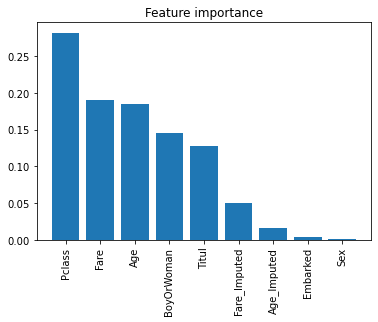

In [106]:
plt.figure()
plt.title('Feature importance')
plt.bar(range(len(names)), features_weights[indices])
plt.xticks(range(len(names)), names, rotation=90)
plt.show()

# Scoring

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

pred = best_model.predict(X_valid)

print(confusion_matrix(y_valid, pred))
print(classification_report(y_valid, pred))
print(roc_auc_score(y_valid, pred))

[[139  18]
 [ 34  76]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.81      0.69      0.75       110

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.79       267
weighted avg       0.81      0.81      0.80       267

0.7881297046902143


# Make Prediction & Submit

In [108]:
X_test = pd.get_dummies(test_data[features])
X_test

,Pclass,Fare,Age,BoyOrWoman,Titul,Fare_Imputed,Age_Imputed,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,7.8292,34.5,0,3,0,0,0,1,0,0,1
1,3,7.0000,47.0,1,3,0,0,0,0,1,1,0
2,2,9.6875,62.0,0,3,0,0,0,1,0,0,1
3,3,8.6625,27.0,0,3,0,0,0,0,1,0,1
4,3,12.2875,22.0,1,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,8.0500,28.3,0,3,0,1,0,0,1,0,1
414,1,108.9000,39.0,1,3,0,0,1,0,0,1,0
415,3,7.2500,38.5,0,3,0,0,0,0,1,0,1
416,3,8.0500,28.3,0,3,0,1,0,0,1,0,1


In [109]:
results = best_model.predict(X_test)

In [110]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : results})
output.to_csv('jupyter_submission.csv', index=False)

# Result

## 0.79425 with 3561/53297 ~ top 7%